<a href="https://colab.research.google.com/github/oliverZZ/193B_Glucose_Monitor/blob/master/Glucose_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import pandas as pd
pd.options.display.max_rows = 20
import matplotlib.pyplot as plt
import numpy as np

# Modify the dataset slightly
pt118 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '118', skiprows = 1) 
pt185 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '185', skiprows = 1)
pt199 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '199', skiprows = 1)
pt205 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '205', skiprows = 1)
pt232 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '232', skiprows = 1)
pt240 = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_Data.xlsx', '240', skiprows = 1)

# BG_data = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose.xlsx')

In [0]:
def Data_preprocess(df):

  # drop Nan
  df = df.replace('None', np.NaN)
  df = df.dropna()
  df = df.reset_index(drop = True)

  # add glucose changes
  temp = []
  for i in range(0, len(df) - 1):
    temp.append(df.POC_Glucose[i + 1] - df.POC_Glucose[i])
  temp.append(np.NaN)
  df.insert(3, "d_Glucose", temp, False)

  temp = []
  for i in range(0, len(df) - 2):
    temp.append(df.POC_Glucose[i + 2] - df.POC_Glucose[i])
  temp.append(np.NaN)
  temp.append(np.NaN)
  df.insert(4, "dd_Glucose", temp, False)

  df = df.dropna()
  df = df.reset_index(drop = True)

  return df

In [4]:
pt118 = Data_preprocess(pt118)
# pt185 = Data_preprocess(pt185)
# pt199 = Data_preprocess(pt199)
# pt205 = Data_preprocess(pt205)
# pt232 = Data_preprocess(pt232)
# pt240 = Data_preprocess(pt240)

pt118

,Time,POC_Glucose,Insulin_Rate,d_Glucose,dd_Glucose
0,0,507,7.0,-10.0,-36.0
1,1,497,10.0,-26.0,-63.0
2,2,471,15.0,-37.0,-87.0
3,3,434,15.0,-50.0,-97.0
4,4,384,15.0,-47.0,-80.0
...,...,...,...,...,...
1941,2041,135,5.9,11.0,10.0
1942,2042,146,7.3,-1.0,-38.0
1943,2043,145,7.3,-37.0,-25.0
1944,2044,108,1.8,12.0,47.0


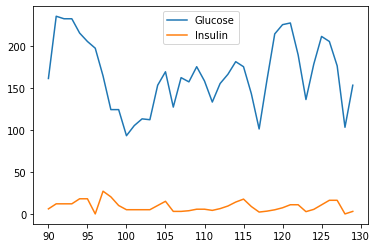

In [5]:
# plt.plot(pt118["Time"][90:130], pt205.POC_Glucose[90:130])
# plt.plot(pt118.POC_Glucose[0:1500], pt118.Insulin_Rate[0:1500], 'o')
plt.plot(pt118.POC_Glucose[90:130], label='Glucose')
plt.plot(pt118.Insulin_Rate[90:130], label='Insulin')
plt.legend()
plt.show()

### Linear Regression ###

In [0]:
len_data, num_cols = pt118.shape
train_set = pt118[0 : round(0.7 * len_data)]
test_set = pt118[round(0.7 * len_data) + 1 ::]

In [7]:
from sklearn.linear_model import LinearRegression
x = train_set.POC_Glucose.values.reshape(-1, 1)
y = train_set.Insulin_Rate
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.26505716528236545


In [0]:
test_set = test_set.reset_index(drop = True)
test_x = test_set.POC_Glucose.values.reshape(-1, 1)
test_y = test_set.Insulin_Rate

prediction = model.predict(test_x)

In [9]:
from sklearn import metrics

# print(metrics.mean_absolute_error(test_y, prediction))
# print(metrics.mean_squared_error(test_y, prediction))
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

2.2729306511590357


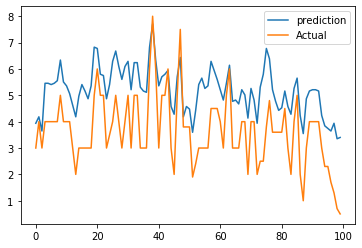

In [10]:
plt.plot(prediction[0:100], label='prediction')
plt.plot(test_set.Insulin_Rate[0:100], label='Actual')
plt.legend()
plt.show()

### Multiple Linear Regression ###

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = pt118[['POC_Glucose', 'Insulin_Rate','d_Glucose']].values
y = pt118['dd_Glucose'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

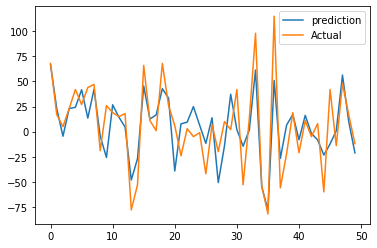

In [38]:
plt.plot(y_pred[150:200], label='prediction')
plt.plot(y_test[150:200], label='Actual')
plt.legend()
plt.show()

In [36]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

26.205318320820236


### Polynomial Regression ###

In [0]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

x = pt118[['POC_Glucose', 'Insulin_Rate']].values
y = pt118['d_Glucose'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree = 4) 
x_poly = poly.fit_transform(x_train) 
  
model = LinearRegression()
model.fit(x_poly, y_train)

y_pred = model.predict(poly.fit_transform(x_test))


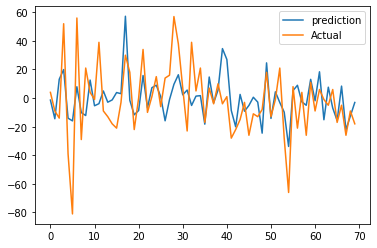

In [73]:
plt.plot(y_pred[180:250], label='prediction')
plt.plot(y_test[180:250], label='Actual')
plt.legend()
plt.show()

In [71]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r_sq = model.score(poly.fit_transform(x),y)
print('coefficient of determination:', r_sq)

23.72729484206011
coefficient of determination: 0.26739365308843877
